In [246]:
# we will start by loading energy consumption data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [247]:
ec_df = pd.read_csv('../data/trainData/energy consumption.csv')
ec_df

,Site Name,Day,Hour,Total Energy(kWh)
0,site10,1,0,3.91
1,site10,1,1,3.99
2,site10,1,2,3.98
3,site10,1,3,3.99
4,site10,1,4,3.97
...,...,...,...,...
14395,site8,60,19,1.79
14396,site8,60,20,1.86
14397,site8,60,21,1.62
14398,site8,60,22,1.64


In [248]:
# chech for null in ec_df 
ec_df.isnull().sum()
# So found no null in this dataframe 
# Site Name            0
# Day                  0
# Hour                 0
# Total Energy(kWh)    0
# dtype: int64

# Find total average power usage per hour 
average_power_used_per_hour = np.mean(ec_df[['Total Energy(kWh)']])

print(f'The average power used per hour is {average_power_used_per_hour:.2f} kWh')

# The average power used per hour is 5.68 kWh

# After finding the average power used on all place we can find which time of the day need high amount of power 


The average power used per hour is 5.68 kWh


In [249]:
# We will find average find the average of all day from all station 
max_power = np.max(ec_df[['Total Energy(kWh)']])

min_power = np.min(ec_df[['Total Energy(kWh)']])

In [251]:
ec_df[ec_df['Total Energy(kWh)'] == max_power ]


,Site Name,Day,Hour,Total Energy(kWh)
10483,site2,47,19,11.67


In [252]:
sp_df = pd.read_csv('../data/trainData/solar power and weather condition.csv')
sp_df[sp_df['Energy Output(kWh)'] == sp_df['Energy Output(kWh)'].max()]

,Site Name,Day,Hour,Solar Zenith Angle,Clearsky DHI,Clearsky DNI,Clearsky GHI,Relative Humidity,DHI,DNI,GHI,Energy Output(kWh)
6732,site4,41,12,45.61,73.99,890.07,679.76,62.22,112.29,0.0,109.73,26.428


In [267]:
# # Merging ec_df and sp_df on the 'Site Name' column
# merged_df = pd.merge(ec_df, sp_df, on=['Site Name', 'Day', 'Hour'], how='inner')

# print(merged_df)

In [256]:
si_df = pd.read_csv('../data/trainData/site information and grid outage.csv')
si_df

,Site Id,diesel power(kW),battery capacity (Ah),rated voltage（V）,battery charge coefficient,battery discharge coefficient,init SOC,DOD,grid power(kW),grid outage plan
0,site1,18.0,300,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
1,site2,17.6,760,54,0.35,1.2,0.2,0.15,14,[false false false false false false false fal...
2,site3,12.8,760,54,0.35,1.2,0.2,0.15,10,[false false false false false false false fal...
3,site4,17.6,760,54,0.35,1.2,0.2,0.15,14,[true true true true true true true true true ...
4,site5,17.6,380,54,0.35,1.2,0.2,0.15,12,[false false false false false true true true ...
5,site6,17.6,760,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
6,site7,18.0,380,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
7,site8,10.8,400,54,0.35,1.2,0.2,0.15,12,[false false false false false false false fal...
8,site9,12.8,400,54,0.35,1.2,0.2,0.15,8,[true true true true true true true true true ...
9,site10,17.6,380,54,0.35,1.2,0.2,0.15,10,[false false false false false true true true ...


In [257]:

# Rename 'Site Id' to 'Site Name' in site_info_df
si_df.rename(columns={'Site Id': 'Site Name'}, inplace=True)
si_df

,Site Name,diesel power(kW),battery capacity (Ah),rated voltage（V）,battery charge coefficient,battery discharge coefficient,init SOC,DOD,grid power(kW),grid outage plan
0,site1,18.0,300,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
1,site2,17.6,760,54,0.35,1.2,0.2,0.15,14,[false false false false false false false fal...
2,site3,12.8,760,54,0.35,1.2,0.2,0.15,10,[false false false false false false false fal...
3,site4,17.6,760,54,0.35,1.2,0.2,0.15,14,[true true true true true true true true true ...
4,site5,17.6,380,54,0.35,1.2,0.2,0.15,12,[false false false false false true true true ...
5,site6,17.6,760,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
6,site7,18.0,380,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
7,site8,10.8,400,54,0.35,1.2,0.2,0.15,12,[false false false false false false false fal...
8,site9,12.8,400,54,0.35,1.2,0.2,0.15,8,[true true true true true true true true true ...
9,site10,17.6,380,54,0.35,1.2,0.2,0.15,10,[false false false false false true true true ...


In [258]:
# so by take day 1 site 1 we know the power produced by solar is half smaller to what the power telecommunication use 
# lets go to the whole 60 days the research done to know the difference in site 1 in 60 days 


In [268]:
energy_consumption_hourly_avg = ec_df.groupby('Hour')['Total Energy(kWh)'].mean().reset_index()

print(energy_consumption_hourly_avg['Total Energy(kWh)'])
# np.mean(energy_consumption_hourly_avg)


0     4.953789
1     4.776992
2     4.575942
3     4.643008
4     4.996533
5     5.318542
6     5.602358
7     5.685758
8     5.875025
9     6.014800
10    6.068867
11    6.089833
12    6.125917
13    6.139800
14    6.145356
15    6.142272
16    6.151937
17    6.108998
18    6.165078
19    6.151245
20    6.086270
21    5.918014
22    5.532170
23    5.118014
Name: Total Energy(kWh), dtype: float64


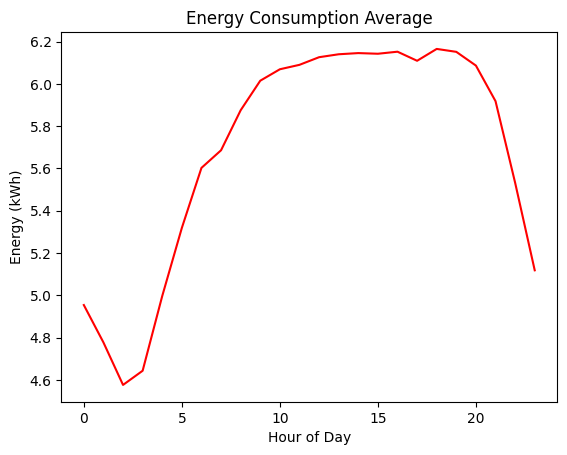

In [269]:

plt.plot(energy_consumption_hourly_avg['Hour'], energy_consumption_hourly_avg['Total Energy(kWh)'], c='r')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Consumption Average')
plt.show()

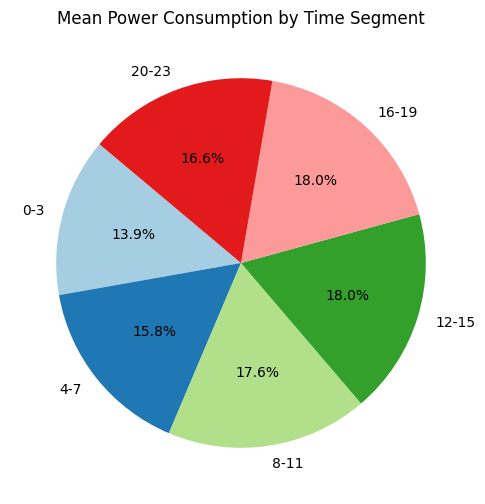

In [270]:
bins = [-1, 3, 7, 11, 15, 19, 23]
labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']
energy_consumption_hourly_avg['Time Segment'] = pd.cut(energy_consumption_hourly_avg['Hour'], bins=bins, labels=labels, right=True)

# Calculate mean power consumption for each segment
segment_avg = energy_consumption_hourly_avg.groupby('Time Segment')['Total Energy(kWh)'].mean()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(segment_avg, labels=segment_avg.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(segment_avg))))
plt.title('Mean Power Consumption by Time Segment')
plt.show()

In [272]:
total_energy_used_per_day = energy_consumption_hourly_avg['Total Energy(kWh)'].sum()

print(f'The mean amount of electricity used per day is {total_energy_used_per_day:.2f} KWh')

The mean amount of electricity used per day is 136.39 KWh


In [273]:
energy_produced_hourly_avg = sp_df.groupby('Hour')['Energy Output(kWh)'].mean().reset_index()

In [274]:
total_energy_produced_per_day = energy_produced_hourly_avg['Energy Output(kWh)'].sum()

print(f'The mean amount of electricity produced by solar per day is {total_energy_produced_per_day:.2f} KWh')

The mean amount of electricity produced by solar per day is 68.59 KWh


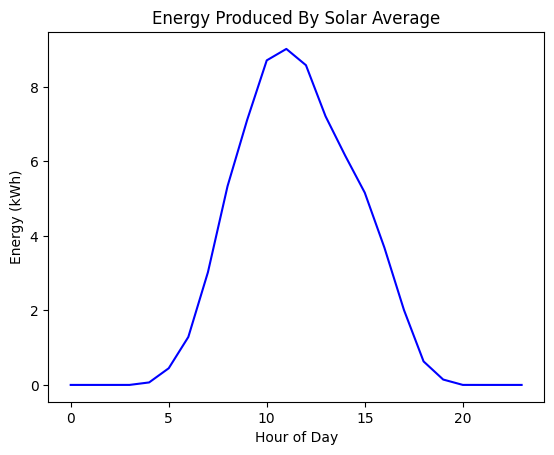

In [275]:

plt.plot(energy_produced_hourly_avg['Hour'], energy_produced_hourly_avg['Energy Output(kWh)'], c='b')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Produced By Solar Average')
plt.show()

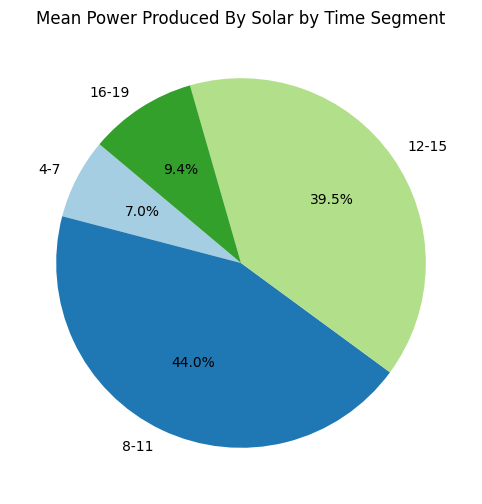

In [276]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `energy_produced_hourly_avg` is already defined
bins = [-1, 3, 7, 11, 15, 19, 23]
labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']
energy_produced_hourly_avg['Time Segment'] = pd.cut(energy_produced_hourly_avg['Hour'], bins=bins, labels=labels, right=True)

# Calculate mean power consumption for each segment
segment_avg = energy_produced_hourly_avg.groupby('Time Segment')['Energy Output(kWh)'].mean()

# Filter out segments with near-zero values
filtered_segment_avg = segment_avg[(segment_avg > 0.001)]

# Plot pie chart for the filtered segments
plt.figure(figsize=(10, 6))
plt.pie(filtered_segment_avg, labels=filtered_segment_avg.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(filtered_segment_avg))))
plt.title('Mean Power Produced By Solar by Time Segment')
plt.show()


# We remove 20 t0 3 because the sunrise differ in occurence at difference site  but earlier it can appear is 4:30 

In [277]:


# Calculate battery capacity in kWh
si_df['Battery Capacity (kWh)'] = (si_df['battery capacity (Ah)'] * si_df['rated voltage（V）']) / 1000

# Calculate effective battery capacity
si_df['Effective Battery Capacity (kWh)'] = (si_df['Battery Capacity (kWh)'] *
                                          si_df['battery charge coefficient'] *
                                          si_df['battery discharge coefficient'])

# Calculate available energy
si_df['Available Energy (kWh)'] = si_df['Effective Battery Capacity (kWh)'] * (1 - si_df['init SOC'])

# Calculate total power
si_df['Total Power (kW)'] = si_df['diesel power(kW)'] + si_df['grid power(kW)']

# Analyze grid outage plan
# si_df['Grid Outage Count'] = si_df['grid outage plan'].apply(lambda x: sum(x))

print(si_df[['Site Name', 'Battery Capacity (kWh)', 'Effective Battery Capacity (kWh)', 
          'Available Energy (kWh)', 'Total Power (kW)']])

  Site Name  Battery Capacity (kWh)  Effective Battery Capacity (kWh)  \
0     site1                   16.20                            6.8040   
1     site2                   41.04                           17.2368   
2     site3                   41.04                           17.2368   
3     site4                   41.04                           17.2368   
4     site5                   20.52                            8.6184   
5     site6                   41.04                           17.2368   
6     site7                   20.52                            8.6184   
7     site8                   21.60                            9.0720   
8     site9                   21.60                            9.0720   
9    site10                   20.52                            8.6184   

   Available Energy (kWh)  Total Power (kW)  
0                 5.44320              26.0  
1                13.78944              31.6  
2                13.78944              22.8  
3           

In [278]:
ec_df

,Site Name,Day,Hour,Total Energy(kWh)
0,site10,1,0,3.91
1,site10,1,1,3.99
2,site10,1,2,3.98
3,site10,1,3,3.99
4,site10,1,4,3.97
...,...,...,...,...
14395,site8,60,19,1.79
14396,site8,60,20,1.86
14397,site8,60,21,1.62
14398,site8,60,22,1.64


In [279]:
# Train Energy Consumption model 


In [280]:
# First is ensuring there is no outlier and cleaning data 
missing_values = ec_df.isnull().sum()
# print("Missing values per column:\n", missing_values)

#------------------------------------------------------------

# Missing values per column:
#  Site Name            0
# Day                  0
# Hour                 0
# Total Energy(kWh)    0
# dtype: int64

#------------------------------------------------------------

# There is no missing data 


import pandas as pd

# Load your data
# ec_df = pd.read_csv('your_data.csv')

# Check data types
print(ec_df.dtypes)

# Filter numeric columns for IQR calculation
numeric_df = ec_df.select_dtypes(include=['float64', 'int64'])

# Calculate the IQR for numeric features
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = ((numeric_df < (Q1 - threshold * IQR)) | (numeric_df > (Q3 + threshold * IQR))).any(axis=1)
# print("Number of outliers detected:", outliers.sum())

#if it is, remove outliers from the original DataFrame
# data_cleaned = ec_df[~outliers]


# Site Name             object
# Day                    int64
# Hour                   int64
# Total Energy(kWh)    float64
# dtype: object
# Number of outliers detected: 0


Site Name             object
Day                    int64
Hour                   int64
Total Energy(kWh)    float64
dtype: object


In [281]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset


ec_df = pd.read_csv('../data/trainData/energy consumption.csv')


# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
seq_length = 24  # Number of hours to look back

# Create sequences
X, y = create_sequences(ec_df['Total Energy(kWh)'].values, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create data loaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [282]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Initialize hidden states with correct batch size
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), hidden_size).to(x.device)
        
        # Forward pass
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


# Parameters
input_size = 1  # Number of features
hidden_size = 50
num_layers = 2

# Instantiate model
model = LSTMModel(input_size, hidden_size, num_layers)


In [294]:
# import torch.optim as optim

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 100

# for epoch in range(num_epochs):
#     model.train()
#     for batch_x, batch_y in train_loader:
#         # Ensure batch_x is of the shape [batch_size, seq_length, input_size]
#         batch_x = batch_x.view(-1, seq_length, input_size).to(torch.float32)
#         batch_y = batch_y.view(-1).to(torch.float32)
        
#         # Forward pass
#         outputs = model(batch_x)
        
#         # Compute loss
#         loss = criterion(outputs.squeeze(), batch_y)
        
#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     # Print loss every epoch
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


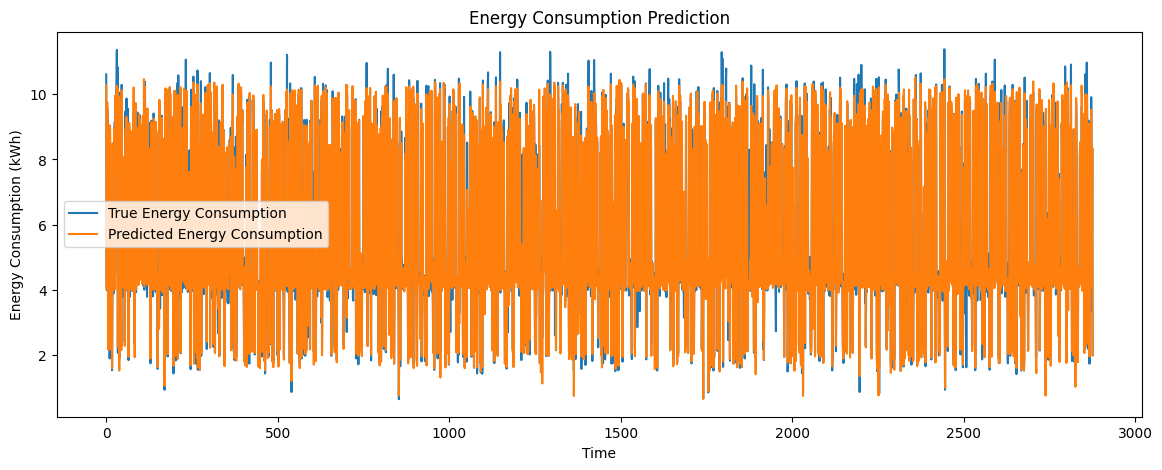

In [290]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        # Ensure correct input shape
        batch_x = batch_x.view(-1, seq_length, input_size).to(torch.float32)
        batch_y = batch_y.view(-1).to(torch.float32)
        
        # Forward pass
        outputs = model(batch_x)
        y_pred.extend(outputs.squeeze().tolist())
        y_true.extend(batch_y.tolist())



y_pred = (np.array(y_pred).reshape(-1, 1))
y_true = (np.array(y_true).reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_true, label='True Energy Consumption')
plt.plot(y_pred, label='Predicted Energy Consumption')
plt.title('Energy Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


In [291]:
import torch
import numpy as np

# Assume your model is already trained and available as 'model'
model.eval()

# Past two hours of readings
past_hours = np.array([5.1, 5.7], dtype=np.float32)



# Reshape for the model: [batch_size, seq_length, input_size]
input_data = torch.tensor(past_hours.reshape(1, -1, 1), dtype=torch.float32)

# Forward pass to predict the next value
with torch.no_grad():
    prediction = model(input_data)
    
# Convert prediction to numpy array and inverse transform if needed
predicted_value = prediction.item()



print(f'Predicted energy consumption for the next hour: {predicted_value:.2f} kWh')


Predicted energy consumption for the next hour: 4.51 kWh


In [292]:
import torch
import numpy as np

def predict_future(model, past_data, num_steps):
    model.eval()

    
    predictions = []
    
    # Prepare the input data
    input_data = torch.tensor(past_data.reshape(1, -1, 1), dtype=torch.float32)
    
    with torch.no_grad():
        for _ in range(num_steps):
            # Predict the next value
            next_value = model(input_data)
            
            # Collect the predicted value
            predictions.append(next_value.squeeze().item())
            
            # Update input_data to include the new prediction
            next_value = next_value.unsqueeze(0)  # Add batch dimension
            next_value = next_value[:, -1:, :]    # Keep the last prediction
            
            # Update input_data by shifting and appending the new prediction
            input_data = torch.cat([input_data[:, 1:, :], next_value], dim=1)

    
    return predictions


past_hours = np.array([3.91, 3.99, 3.98], dtype=np.float32)

# Predict the next 3 hours
num_steps = 3
future_predictions = predict_future(model, past_hours, num_steps)

print(f'Predicted energy consumption for the next {num_steps} hours: {future_predictions}')


Predicted energy consumption for the next 3 hours: [2.1717641353607178, 0.37015047669410706, -0.07563650608062744]


In [293]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert lists to numpy arrays
y_pred = np.array(y_pred).reshape(-1)
y_true = np.array(y_true).reshape(-1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²) score
r2 = r2_score(y_true, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²) score: {r2:.4f}')


Mean Absolute Error (MAE): 0.2605
Mean Squared Error (MSE): 0.2055
Root Mean Squared Error (RMSE): 0.4533
R-squared (R²) score: 0.9707


In [288]:
# Save the model
# torch.save(model.state_dict(), '../data/energy_lstm_model_better2.pth')


model = LSTMModel(input_size, hidden_size, num_layers) 
model.load_state_dict(torch.load('../data/energy_lstm_model_better2.pth'))
model.eval()


LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [295]:
past_hours = np.array([1.0, 1.0, 1.0], dtype=np.float32)  # Simplified input
num_steps = 3
future_predictions = predict_future(model, past_hours, num_steps)
print(f'Predicted energy consumption for the next {num_steps} hours: {future_predictions}')


Predicted energy consumption for the next 3 hours: [1.1301497220993042, 1.1602067947387695, 1.2047158479690552]


In [243]:
import torch
import numpy as np

def predict_future(model, past_data, num_steps):
    model.eval()
    
    # Ensure normalization if used
    # past_data_normalized = scaler.transform(past_data.reshape(-1, 1)).reshape(-1)
    
    predictions = []
    
    # Prepare the input data
    input_data = torch.tensor(past_data.reshape(1, -1, 1), dtype=torch.float32)
    
    with torch.no_grad():
        for _ in range(num_steps):
            next_value = model(input_data)
            predictions.append(next_value.squeeze().item())
            next_value = next_value.unsqueeze(0)  # Add batch dimension
            next_value = next_value[:, -1:, :]    # Keep the last prediction
            input_data = torch.cat([input_data[:, 1:, :], next_value], dim=1)
    
    # Example of inverse normalization (if used)
    # predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    
    return predictions

# Example usage
past_hours = np.array([
    8.36, 6.56, 4.19, 3.98, 7.97, 
    8.21, 8.49, 8.51, 8.50, 8.77, 
    8.81, 8.67, 8.86, 8.90, 8.91
]
, dtype=np.float32)
num_steps = 4
future_predictions = predict_future(model, past_hours, num_steps)

print(f'Predicted energy consumption for the next {num_steps} hours: {future_predictions}')


Predicted energy consumption for the next 4 hours: [8.621942520141602, 7.965129852294922, 5.070547103881836, 3.3471736907958984]
